<a href="https://colab.research.google.com/github/PatrykCiwinski/Project_CNN/blob/main/CNN_beverages_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from matplotlib.image import imread
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
data_dir = '/content/drive/MyDrive/alkohole/data'

In [4]:
os.listdir(data_dir)

['train', 'test']

In [5]:
train_path=data_dir+'/train/'
test_path=data_dir+'/test/'

In [6]:
train_path

'/content/drive/MyDrive/alkohole/data/train/'

In [7]:
bezalko_train_first = train_path+'bezalkoholowe/'+os.listdir(train_path+'/bezalkoholowe')[0]

In [8]:
bezalko_train_first

'/content/drive/MyDrive/alkohole/data/train/bezalkoholowe/tloczone-jablko-i-pigwa-250-ml.jpg'

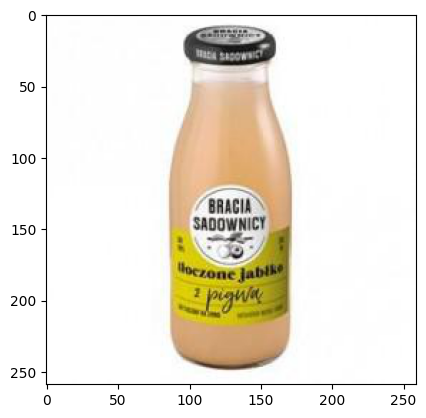

In [9]:
plt.imshow(imread(bezalko_train_first));

In [10]:
wysoko_train_first = train_path+'wysokoprocentowe/'+os.listdir(train_path+'/wysokoprocentowe')[0]

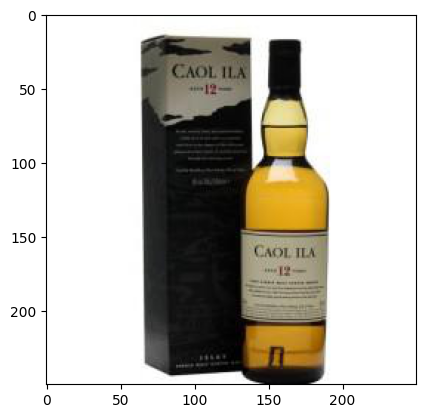

In [11]:
plt.imshow(imread(wysoko_train_first));

In [12]:
data_path = '/content/drive/MyDrive/alkohole/data'
os.makedirs(data_path + '/test', exist_ok=True)
test_size = 0.2

for subcategory in ['bezalkoholowe', 'średnioprocentowe','wysokoprocentowe']:
  os.makedirs(data_path + '/test/' + subcategory, exist_ok=True)
  file_list = os.listdir(data_path + '/train/' + subcategory)
  number_of_samples = int(len(file_list) * test_size)
  for file_name in random.sample(file_list, number_of_samples):
    os.rename(data_path + '/train/' + subcategory + '/' + file_name,
              data_path + '/test/' + subcategory + '/' + file_name)

In [13]:
len(os.listdir(test_path + '/bezalkoholowe'))

191

In [14]:
dim1 = []
dim2 = []

for image_name in os.listdir(test_path+'/bezalkoholowe'):
    img = imread(test_path+'/bezalkoholowe/'+image_name)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [15]:
img_w = int(np.mean(dim1)//1)

In [16]:
img_h = int(np.mean(dim2)//1)

In [17]:
image_shape = (img_h,img_w,3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [244]:
image_gen = ImageDataGenerator()

In [245]:
wysoko_img = imread(wysoko_train_first)

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [248]:
model = Sequential()


model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [249]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 257, 257, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [250]:
from tensorflow.keras.callbacks import EarlyStopping

In [251]:
es = EarlyStopping(monitor='val_loss',patience=3)
batch_size = 16

In [252]:
train_image = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 838 images belonging to 3 classes.


In [253]:
test_image = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                          shuffle=False)

Found 422 images belonging to 3 classes.


In [254]:
history = model.fit(train_image, epochs=10,validation_data=test_image,
                    callbacks=[es])

Epoch 1/10
53/53 [==============================] - 8s 122ms/step - loss: 40.0113 - accuracy: 0.5979 - val_loss: 0.7733 - val_accuracy: 0.7417
Epoch 2/10
53/53 [==============================] - 5s 96ms/step - loss: 0.7615 - accuracy: 0.7005 - val_loss: 0.8132 - val_accuracy: 0.6872
Epoch 3/10
53/53 [==============================] - 6s 117ms/step - loss: 0.6597 - accuracy: 0.7697 - val_loss: 0.8275 - val_accuracy: 0.7725
Epoch 4/10
53/53 [==============================] - 5s 97ms/step - loss: 0.5200 - accuracy: 0.8126 - val_loss: 0.6784 - val_accuracy: 0.7915
Epoch 5/10
53/53 [==============================] - 5s 100ms/step - loss: 0.4361 - accuracy: 0.8401 - val_loss: 0.7640 - val_accuracy: 0.8057
Epoch 6/10
53/53 [==============================] - 5s 95ms/step - loss: 0.4006 - accuracy: 0.8580 - val_loss: 0.6740 - val_accuracy: 0.8128
Epoch 7/10
53/53 [==============================] - 6s 115ms/step - loss: 0.3292 - accuracy: 0.8783 - val_loss: 0.6505 - val_accuracy: 0.7938
Epoch 8/

In [255]:
result = pd.DataFrame(history.history)

<Axes: >

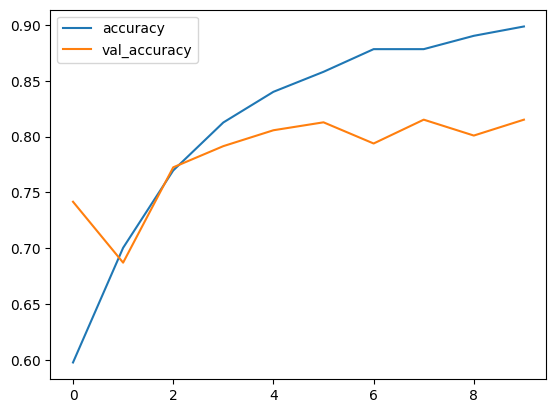

In [256]:
result[['accuracy','val_accuracy']].plot()

<Axes: >

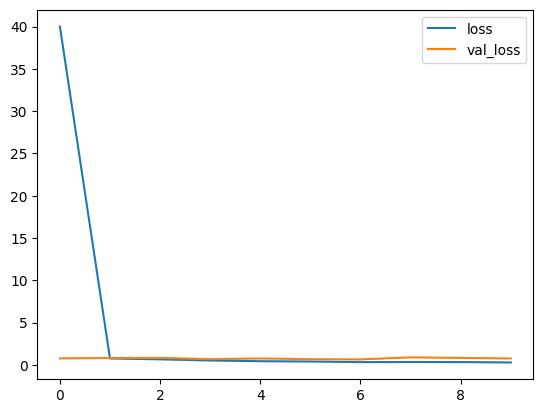

In [257]:
result[['loss','val_loss']].plot()

In [258]:
from sklearn.metrics import classification_report

In [259]:
predict = model.predict(test_image)

27/27 [==============================] - 2s 61ms/step


In [260]:
predictions=np.argmax(predict,axis=1)

In [262]:
print(classification_report(test_image.classes,predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       191
           1       0.93      0.88      0.91        95
           2       0.76      0.66      0.71       136

    accuracy                           0.82       422
   macro avg       0.83      0.81      0.82       422
weighted avg       0.82      0.82      0.81       422



In [263]:
from tensorflow.keras.preprocessing import image

In [282]:
my_image = image.load_img('/content/drive/MyDrive/alkohole/data/test/wysokoprocentowe/whisky-royal-brackla-12yo-700-ml-.jpg',target_size=image_shape)

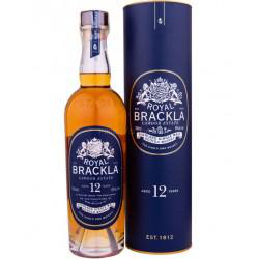

In [283]:
my_image

In [284]:
my_image = image.img_to_array(my_image)

In [285]:
my_image = np.expand_dims(my_image, axis=0)

In [286]:
my_image.shape

(1, 259, 259, 3)

In [287]:
pred_img=model.predict(my_image)

1/1 [==============================] - 0s 21ms/step


In [288]:
prediction_img=np.argmax(pred_img,axis=1)

In [289]:
prediction_img

array([2])

In [290]:
test_image.class_indices

{'bezalkoholowe': 0, 'średnioprocentowe': 1, 'wysokoprocentowe': 2}